In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/reg-dataset/ex2data2.txt


In [2]:
df = np.array(pd.read_csv('../input/reg-dataset/ex2data2.txt'))
X_train = df[:,:2]
y_train = df[:, -1]

In [3]:
print(f"First 5 elements in X_train: {X_train[:5]}")
print(f"Shape of X_train: {X_train.shape}, It's type is: {type(X_train)}")
print(f"First 5 elements in y_train: {y_train[:5]}")
print(f"Shape of y_train: {y_train.shape}, It's type is: {type(y_train)}")

First 5 elements in X_train: [[-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]
 [-0.52477   0.2098  ]]
Shape of X_train: (117, 2), It's type is: <class 'numpy.ndarray'>
First 5 elements in y_train: [1. 1. 1. 1. 1.]
Shape of y_train: (117,), It's type is: <class 'numpy.ndarray'>


In order to better fit the data one may create more features by engineering the available features. Using map_feature() we will generate higher-dimensional features by mapping the features into all polynomial terms of  𝑥1 up to 𝑥6.

In [4]:
#mapping features into polynomial features
def map_feature(X1, X2):
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)


In [5]:
X_mapped = map_feature(X_train[:,0], X_train[:,1])
print(f"Shape of X_train before mapping: \n{X_mapped.shape}")
print(f"Shape of X_train after mapping: \n {X_train.shape}")

Shape of X_train before mapping: 
(117, 27)
Shape of X_train after mapping: 
 (117, 2)


In [6]:
# function to plot our data points
def plot_data(x,y, pos_label = 'y=1', neg_label='y=0'): #plot_data() is a function to plot your training data and able to diffrentiate between positive(1) and negative'0' classes
    pos = y == 1 #pos now is boolean array of size  n [true, false,......]
    neg = y == 0 
    plt.plot(x[pos,0],x[pos,1], 'r+', label=pos_label)
    plt.plot(x[neg,0],x[neg,1], 'yo', label=neg_label)

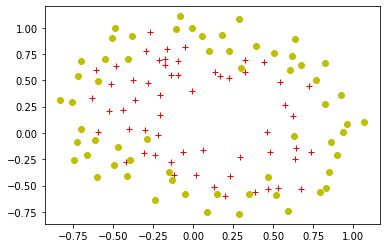

In [7]:
#plotting our data
plot_data(X_mapped, y_train)

In [8]:
def sigmoid(z):
    return 1/(1+math.exp(-z))

def compute_cost_reg(X, y, w, b, lambda_):
    m,n = X.shape
    cost= 0
    for i in range(m):
        z = np.dot(X[i], w) +b
        pred = sigmoid(z)
        if y[i]==1:
            cost += - math.log2(pred)
        else:
            cost += - math.log2(1-pred)
    cost/=m
    reg_term=0
    for j in range(n):
        reg_term+=(w[j]**2)
    reg_term = reg_term * (lambda_/(2*m))
    cost+=reg_term
    return cost

def compute_gradient_reg(X, y, w, b, lambda_):
    m,n = X.shape
    d_dw = np.zeros(n)
    d_db = 0
    for i in range(m):
        z = np.dot(X[i], w) +b
        pred = sigmoid(z)
        d_db += (pred - y[i])
        for j in range(n):
            d_dw[j] += ((pred - y[i]) * X[i,j])+ w[j]* (lambda_/m)
    d_dw /=m
    d_db /= m
    return d_dw, d_db

def gradient_descent_reg(X,y,w_init,b_init, alpha, epsilon, iterations, lambda_): #this version of gradient descent terminate when either the cost reached a certain value'epsilon' after a certain number of iterations
    w = w_init
    b = b_init
    m,n = X.shape
    cost = compute_cost_reg(X,y,w,b, lambda_)
    itr =0
    J_history=[]
    while cost>epsilon and itr < iterations:         
        d_dw, d_db = compute_gradient_reg(X,y,w,b, lambda_)
        w = w - alpha*d_dw
        b = b - alpha * d_db
        cost = compute_cost_reg(X,y,w,b,lambda_)
        if itr<100000:    
            J_history.append(cost)  # needed for plotting the learning curve
        itr +=1 
    return w, b, itr, J_history
def predict(x,w,b, threshold=0.5):
    m,n = x.shape
    p = np.zeros(m)
    for i in range(m):
        z = np.dot(w,x[i])+b
        f_x = sigmoid(z)
        if f_x>= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    return p
def accuracy(y_pred, y):
    m = len(y)
    acc = 0
    for i in range(m):
        if y_pred[i] == y[i]:
            acc +=1
    acc = (acc/m)*100
    return acc

In [9]:
# Checking that compute_cost_reg function works fine, expected output: 0.9544711390490436
np.random.seed(1)
initial_w = np.random.rand(27) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.9544711390490436


In [10]:
#checking that compute_gradient_reg works c
np.random.seed(1) 
initial_w  = np.random.rand(27) - 0.5 
initial_b = 0.5 
lambda_ = 0.5
dj_dw, dj_db = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4]}", )

dj_db: 0.07539347940593887
First few elements of regularized dj_dw:
 [-0.01030047  0.01388621  0.05409464  0.00328907]


In [11]:
np.random.seed(1)
initial_w = np.random.rand(27)-0.5
initial_b = 1.

lambda_ = 0.01 #regularization parameter                                         
iterations = 10000
alpha = 0.01
epsilon = 0.001
w,b, itr, J_history = gradient_descent_reg(X_mapped, y_train, initial_w, initial_b, alpha,epsilon, iterations, lambda_)

In [12]:
print(f"Best values for Weights: {w}")
print(f"Best value for b parameters: {b}")
cost = compute_cost_reg(X_mapped,y_train,w,b, lambda_)
print(f"Those weights produce a cost equals: {cost}")
print(f"Gradient Decent reached those values after {itr} iterations.")

Best values for Weights: [ 0.91027702  1.46555781 -2.56834085 -1.03166397 -1.734913   -0.08934453
 -0.68618164 -0.46259185 -0.26632204 -1.50235817 -0.13843725 -0.43050343
 -0.52701864 -0.85771503 -0.62174307 -0.06686036 -0.11613784 -0.21743977
 -0.62762305 -0.80383641 -0.8182157   0.47666306 -0.4844677   0.20317482
  0.04233124  0.27346073 -1.41879601]
Best value for b parameters: 1.4244841413727478
Those weights produce a cost equals: 0.6442723205868225
Gradient Decent reached those values after 10000 iterations.


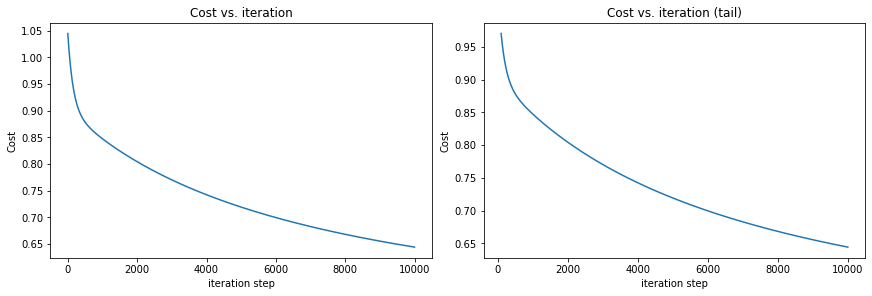

In [13]:
## plotting the learning curve to make sure that gradient decent operates correctly and and cost decreases as number of iterations icreases
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [14]:
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
     
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0.5
        plt.contour(u,v,z, levels = [0.5], colors="g")

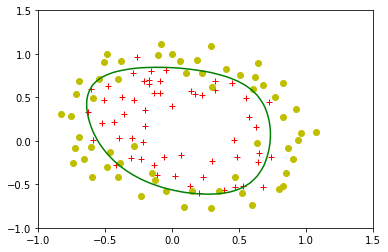

In [15]:
#plotting the decision boundry
plot_decision_boundary(w, b, X_mapped, y_train)

In [16]:
# use the predict function to make prediction of X_train and test the accuracy of the chosen parameters using accuracy
y_pred = predict(X_mapped,w,b)
print(accuracy(y_pred, y_train))

82.05128205128204
